In [10]:
import numpy as np

In [11]:
import math

In [12]:
import matplotlib.pyplot as plt

In [13]:
import sympy

In [14]:
from sympy import *

In [15]:
import matplotlib.animation as animation

In [16]:
import random

Vector n: [0.612 0.707 0.354]
Vector s: [-1.734  1.     1.   ]
Vector j: [-1.061  0.707  0.354]
Vector c: [ 0.354 -1.225  1.839]
Dot product: -5.551115123125783e-17
Vector h: Matrix([[-1.734375*C + 0.353731075917867*S + 5.55111512312578e-17], [1.0*C - 1.22536149313947*S - 1.11022302462516e-16], [1.0*C + 1.83886382793452*S - 5.55111512312578e-17]])
Vector h_ver: Matrix([[-1.734375*C - 3.06422532107399*S], [1.0*C - 3.5430105274918*S - 4.44089209850063e-16], [1.0*C - 1.7715052637459*S]])
Vector K1: Matrix([[(-1.734375*C + 0.353731075917867*S + 5.55111512312578e-17)*(XX*(-1.734375*C + 0.353731075917867*S + 5.55111512312578e-17) + XY*(1.0*C - 1.22536149313947*S - 1.11022302462516e-16) + ZX*(1.0*C + 1.83886382793452*S - 5.55111512312578e-17)) + (1.0*C - 1.22536149313947*S - 1.11022302462516e-16)*(XY*(-1.734375*C + 0.353731075917867*S + 5.55111512312578e-17) + YY*(1.0*C - 1.22536149313947*S - 1.11022302462516e-16) + YZ*(1.0*C + 1.83886382793452*S - 5.55111512312578e-17)) + (1.0*C + 1.83886382

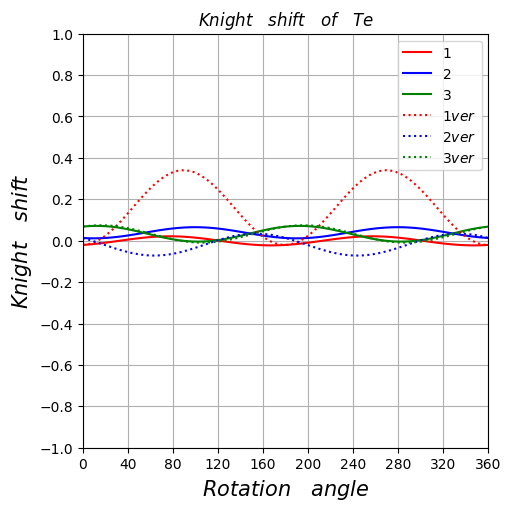

In [17]:
np.set_printoptions(precision=3)

k = np.array(random.sample(range(1,100), 3))
kn = np.linalg.norm(k) #生成したベクトルの大きさ
n = k / kn #まずは単位ベクトル

def orthogonal_vector(n):
    # 入力ベクトルnが(0, 0, 0)でないことを確認
    if np.all(n == 0):
        raise ValueError("The input vector v should not be the zero vector.")

    # 直交ベクトルを計算
    if n[0] != 0:
        s = np.array([-(n[1] + n[2]) / n[0], 1, 1])
    elif n[1] != 0:
        s = np.array([1, -(n[0] + n[2]) / n[1], 1])
    else:
        s = np.array([1, 1, -(n[0] + n[1]) / n[2]])
    
    return s

# nに直交するベクトルを計算
s = orthogonal_vector(n)

# nとsの掛け算
j = n * s

# 確認のための内積計算
dot_product = np.dot(n, s)

# nとsの外積
c = np.cross(n, s)

print(f"Vector n: {n}")
print(f"Vector s: {s}")
print(f"Vector j: {j}")
print(f"Vector c: {c}")
print(f"Dot product: {dot_product}")

n1 = n[0]
n2 = n[1]
n3 = n[2]
c1 = c[0]
c2 = c[1]
c3 = c[2]
s1 = s[0]
s2 = s[1]
s3 = s[2]
C = Symbol('C')
S = Symbol('S')

#nの時の回転行列
T = sympy.Matrix([[n1**(2)*(1-C)+C, n1*n2*(1-C)-n3*S, n1*n3*(1-C)+n2*S], 
            [n1*n2*(1-C)+n3*S, n2**(2)*(1-C)+C, n2*n3*(1-C)-n1*S], 
            [n1*n3*(1-C)-n2*S, n2*n3*(1-C)+n1*S, n3**(2)*(1-C)+C]])

#n×sの時の回転行列
T_ver = sympy.Matrix([[c1**(2)*(1-C)+C, c1*c2*(1-C)-c3*S, c1*c3*(1-C)+c2*S], 
            [c1*c2*(1-C)+c3*S, c2**(2)*(1-C)+C, c2*c3*(1-C)-c1*S], 
            [c1*c3*(1-C)-c2*S, c2*c3*(1-C)+c1*S, c3**(2)*(1-C)+C]])

s_vector = sympy.Matrix([[s1], [s2], [s3]])

#nの時の磁場ベクトル
h = T*s_vector

#n×sの時の磁場ベクトル
h_ver = T_ver*s_vector

print(f"Vector h: {h}")
print(f"Vector h_ver: {h_ver}")

C = Symbol('C')
S = Symbol('S')

k_0 = Symbol('k_0')
k_U = Symbol('k_U')
k_V = Symbol('k_V')
k_X = Symbol('k_X')
k_Y = Symbol('k_Y')
k_Z = Symbol('k_Z')
XX = Symbol('XX')
XY = Symbol('XY')
YY = Symbol('YY')
YZ = Symbol('YZ')
ZZ = Symbol('ZZ')
ZX = Symbol('ZX')

K = sympy.Matrix([[XX, XY, ZX], [XY, YY, YZ], [ZX, YZ, ZZ]])

R2 = Matrix([[np.cos(np.radians(-120)), -np.sin(np.radians(-120)), 0], [np.sin(np.radians(-120)), np.cos(np.radians(-120)), 0], [0, 0, 1]])
R3 = Matrix([[np.cos(np.radians(120)), -np.sin(np.radians(120)), 0], [np.sin(np.radians(120)), np.cos(np.radians(120)), 0], [0, 0, 1]])

H_vector = sympy.Matrix([[h[0], h[1], h[2]]]) 
h_vector = sympy.Matrix([[h[0]], [h[1]], [h[2]]])

H_ver_vector = sympy.Matrix([[h_ver[0], h_ver[1], h_ver[2]]]) 
h_ver_vector = sympy.Matrix([[h_ver[0]], [h_ver[1]], [h_ver[2]]])

#nの時のナイトシフトの磁場角度依存性
K1 = H_vector*K*h_vector
K2 = H_vector*R2*K*R2**(-1)*h_vector
K3 = H_vector*R3*K*R3**(-1)*h_vector

#n×sの時のナイトシフトの磁場角度依存性
K1_ver = H_ver_vector*K*h_ver_vector
K2_ver = H_ver_vector*R2*K*R2**(-1)*h_ver_vector
K3_ver = H_ver_vector*R3*K*R3**(-1)*h_ver_vector

print(f"Vector K1: {K1}")
print(f"Vector K2: {K2}")
print(f"Vector K3: {K3}")
print(f"Vector K1_ver: {K1_ver}")
print(f"Vector K2_ver: {K2_ver}")
print(f"Vector K3_ver: {K3_ver}")

print(K1[0])
print(K2[0])
print(K3[0])
print(K1_ver[0])
print(K2_ver[0])
print(K3_ver[0])

# 数値代入
XX_val = random.uniform(10**(-2), 10**(-4))
YY_val = random.uniform(10**(-2), 10**(-4))
ZZ_val = random.uniform(10**(-2), 10**(-4))
XY_val = random.uniform(10**(-2), 10**(-4))
YZ_val = random.uniform(10**(-2), 10**(-4))
ZX_val = random.uniform(10**(-2), 10**(-4))

K_vals = {XX: XX_val, YY: YY_val, ZZ: ZZ_val, XY: XY_val, YZ: YZ_val, ZX: ZX_val}

# x軸の角度範囲
x = np.linspace(0, 360, 100)

# CとSの値を設定
C_vals = np.cos(np.radians(x))
S_vals = np.sin(np.radians(x))

# テンプレート関数の評価
Te1_vals = [K1.subs({C: C_val, S: S_val, **K_vals})[0] for C_val, S_val in zip(C_vals, S_vals)]
Te2_vals = [K2.subs({C: C_val, S: S_val, **K_vals})[0] for C_val, S_val in zip(C_vals, S_vals)]
Te3_vals = [K3.subs({C: C_val, S: S_val, **K_vals})[0] for C_val, S_val in zip(C_vals, S_vals)]
Tev1_vals = [K1_ver.subs({C: C_val, S: S_val, **K_vals})[0] for C_val, S_val in zip(C_vals, S_vals)]
Tev2_vals = [K2_ver.subs({C: C_val, S: S_val, **K_vals})[0] for C_val, S_val in zip(C_vals, S_vals)]
Tev3_vals = [K3_ver.subs({C: C_val, S: S_val, **K_vals})[0] for C_val, S_val in zip(C_vals, S_vals)]

# プロット
fig, axes = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)
axes.set_title(r"$Knight \quad shift \quad of \quad Te$")
axes.set_xlabel(r"$Rotation \quad angle$", fontsize=15)
axes.set_ylabel(r"$Knight \quad shift$", fontsize=15)

axes.set_xlim([0, 360])
axes.set_ylim([-1, 1])
axes.set_xticks(np.linspace(0, 360, 10))
axes.set_yticks(np.linspace(-1, 1, 11))
axes.grid()

x = np.linspace(0, 360, 100)

axes.plot(x, Te1_vals, color='red')
axes.plot(x, Te2_vals, color='blue')
axes.plot(x, Te3_vals, color='green')
axes.plot(x, Tev1_vals, ":", color='red')
axes.plot(x, Tev2_vals, ":", color='blue')
axes.plot(x, Tev3_vals, ":", color='green')

axes.legend(['$1$','$2$','$3$','$1ver$','$2ver$','$3ver$'])

plt.show()

Vector n: [0.124 0.775 0.62 ]
Vector s: [-11.25   1.     1.  ]
Vector j: [-1.395  0.775  0.62 ]
Vector c: [ 0.155 -7.098  8.841]
Dot product: 0.0
Vector h: Matrix([[-11.25*C + 0.154968931843436*S + 1.38777878078145e-17], [1.0*C - 7.09757707842936*S - 5.55111512312578e-17], [1.0*C + 8.84097756166802*S - 5.55111512312578e-17]])
Vector h_ver: Matrix([[-11.25*C - 15.9385546400974*S + 2.22044604925031e-16], [1.0*C - 99.6159665006087*S], [1.0*C - 79.6927732004869*S]])
Vector K1: Matrix([[(-11.25*C + 0.154968931843436*S + 1.38777878078145e-17)*(XX*(-11.25*C + 0.154968931843436*S + 1.38777878078145e-17) + XY*(1.0*C - 7.09757707842936*S - 5.55111512312578e-17) + ZX*(1.0*C + 8.84097756166802*S - 5.55111512312578e-17)) + (1.0*C - 7.09757707842936*S - 5.55111512312578e-17)*(XY*(-11.25*C + 0.154968931843436*S + 1.38777878078145e-17) + YY*(1.0*C - 7.09757707842936*S - 5.55111512312578e-17) + YZ*(1.0*C + 8.84097756166802*S - 5.55111512312578e-17)) + (1.0*C + 8.84097756166802*S - 5.55111512312578e-17)

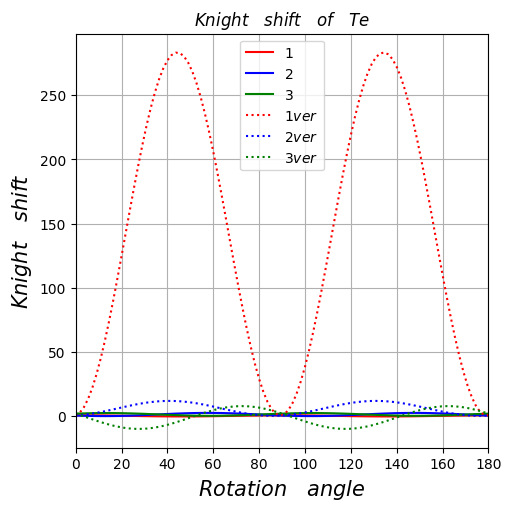

In [18]:
np.set_printoptions(precision=3)

k = np.array(random.sample(range(1,100), 3))
kn = np.linalg.norm(k) #生成したベクトルの大きさ
n = k / kn #まずは単位ベクトル

def orthogonal_vector(n):
    # 入力ベクトルnが(0, 0, 0)でないことを確認
    if np.all(n == 0):
        raise ValueError("The input vector v should not be the zero vector.")

    # 直交ベクトルを計算
    if n[0] != 0:
        s = np.array([-(n[1] + n[2]) / n[0], 1, 1])
    elif n[1] != 0:
        s = np.array([1, -(n[0] + n[2]) / n[1], 1])
    else:
        s = np.array([1, 1, -(n[0] + n[1]) / n[2]])
    
    return s

# vに直交するベクトルを計算
s = orthogonal_vector(n)

# nとsの掛け算
j = n * s

# 確認のための内積計算
dot_product = np.dot(n, s)

# nとsの外積
c = np.cross(n, s)

print(f"Vector n: {n}")
print(f"Vector s: {s}")
print(f"Vector j: {j}")
print(f"Vector c: {c}")
print(f"Dot product: {dot_product}")

n1 = n[0]
n2 = n[1]
n3 = n[2]
c1 = c[0]
c2 = c[1]
c3 = c[2]
s1 = s[0]
s2 = s[1]
s3 = s[2]
C = Symbol('C')
S = Symbol('S')

#nの時の回転行列
T = sympy.Matrix([[n1**(2)*(1-C)+C, n1*n2*(1-C)-n3*S, n1*n3*(1-C)+n2*S], 
            [n1*n2*(1-C)+n3*S, n2**(2)*(1-C)+C, n2*n3*(1-C)-n1*S], 
            [n1*n3*(1-C)-n2*S, n2*n3*(1-C)+n1*S, n3**(2)*(1-C)+C]])

#n×sの時の回転行列
T_ver = sympy.Matrix([[c1**(2)*(1-C)+C, c1*c2*(1-C)-c3*S, c1*c3*(1-C)+c2*S], 
            [c1*c2*(1-C)+c3*S, c2**(2)*(1-C)+C, c2*c3*(1-C)-c1*S], 
            [c1*c3*(1-C)-c2*S, c2*c3*(1-C)+c1*S, c3**(2)*(1-C)+C]])

s_vector = sympy.Matrix([[s1], [s2], [s3]])

#nの時の磁場ベクトル
h = T*s_vector

#n×sの時の磁場ベクトル
h_ver = T_ver*s_vector

print(f"Vector h: {h}")
print(f"Vector h_ver: {h_ver}")

C = Symbol('C')
S = Symbol('S')

k_0 = Symbol('k_0')
k_U = Symbol('k_U')
k_V = Symbol('k_V')
k_X = Symbol('k_X')
k_Y = Symbol('k_Y')
k_Z = Symbol('k_Z')
XX = Symbol('XX')
XY = Symbol('XY')
YY = Symbol('YY')
YZ = Symbol('YZ')
ZZ = Symbol('ZZ')
ZX = Symbol('ZX')

K = sympy.Matrix([[XX, XY, ZX], [XY, YY, YZ], [ZX, YZ, ZZ]])

R2 = Matrix([[np.cos(np.radians(-120)), -np.sin(np.radians(-120)), 0], [np.sin(np.radians(-120)), np.cos(np.radians(-120)), 0], [0, 0, 1]])
R3 = Matrix([[np.cos(np.radians(120)), -np.sin(np.radians(120)), 0], [np.sin(np.radians(120)), np.cos(np.radians(120)), 0], [0, 0, 1]])

H_vector = sympy.Matrix([[h[0], h[1], h[2]]]) 
h_vector = sympy.Matrix([[h[0]], [h[1]], [h[2]]])

H_ver_vector = sympy.Matrix([[h_ver[0], h_ver[1], h_ver[2]]]) 
h_ver_vector = sympy.Matrix([[h_ver[0]], [h_ver[1]], [h_ver[2]]])

#nの時のナイトシフトの磁場角度依存性
K1 = H_vector*K*h_vector
K2 = H_vector*R2*K*R2**(-1)*h_vector
K3 = H_vector*R3*K*R3**(-1)*h_vector

#n×sの時のナイトシフトの磁場角度依存性
K1_ver = H_ver_vector*K*h_ver_vector
K2_ver = H_ver_vector*R2*K*R2**(-1)*h_ver_vector
K3_ver = H_ver_vector*R3*K*R3**(-1)*h_ver_vector

print(f"Vector K1: {K1}")
print(f"Vector K2: {K2}")
print(f"Vector K3: {K3}")
print(f"Vector K1_ver: {K1_ver}")
print(f"Vector K2_ver: {K2_ver}")
print(f"Vector K3_ver: {K3_ver}")

print(K1[0])
print(K2[0])
print(K3[0])
print(K1_ver[0])
print(K2_ver[0])
print(K3_ver[0])

# 数値代入
XX_val = random.uniform(10**(-2), 10**(-4))
YY_val = random.uniform(10**(-2), 10**(-4))
ZZ_val = random.uniform(10**(-2), 10**(-4))
XY_val = random.uniform(10**(-2), 10**(-4))
YZ_val = random.uniform(10**(-2), 10**(-4))
ZX_val = random.uniform(10**(-2), 10**(-4))

K_vals = {XX: XX_val, YY: YY_val, ZZ: ZZ_val, XY: XY_val, YZ: YZ_val, ZX: ZX_val}

# x軸の角度範囲
x = np.linspace(0, 360, 100)

# CとSの値を設定
C_vals = np.cos(np.radians(x))
S_vals = np.sin(np.radians(x))

# テンプレート関数の評価
Te1_vals = [K1.subs({C: C_val, S: S_val, **K_vals})[0] for C_val, S_val in zip(C_vals, S_vals)]
Te2_vals = [K2.subs({C: C_val, S: S_val, **K_vals})[0] for C_val, S_val in zip(C_vals, S_vals)]
Te3_vals = [K3.subs({C: C_val, S: S_val, **K_vals})[0] for C_val, S_val in zip(C_vals, S_vals)]
Tev1_vals = [K1_ver.subs({C: C_val, S: S_val, **K_vals})[0] for C_val, S_val in zip(C_vals, S_vals)]
Tev2_vals = [K2_ver.subs({C: C_val, S: S_val, **K_vals})[0] for C_val, S_val in zip(C_vals, S_vals)]
Tev3_vals = [K3_ver.subs({C: C_val, S: S_val, **K_vals})[0] for C_val, S_val in zip(C_vals, S_vals)]

# プロット
fig, axes = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)
axes.set_title(r"$Knight \quad shift \quad of \quad Te$")
axes.set_xlabel(r"$Rotation \quad angle$", fontsize=15)
axes.set_ylabel(r"$Knight \quad shift$", fontsize=15)

axes.set_xlim([0, 180])
axes.set_xticks(np.linspace(0, 180, 10))
axes.grid()

x = np.linspace(0, 180, 100)

axes.plot(x, Te1_vals, color='red')
axes.plot(x, Te2_vals, color='blue')
axes.plot(x, Te3_vals, color='green')
axes.plot(x, Tev1_vals, ":", color='red')
axes.plot(x, Tev2_vals, ":", color='blue')
axes.plot(x, Tev3_vals, ":", color='green')

axes.legend(['$1$','$2$','$3$','$1ver$','$2ver$','$3ver$'])

# 自動スケール調整
plt.autoscale(enable=True, axis='y')

plt.show()

式とフローチャート
回転行列3つ
nsteta,↑, ナイトシフト
一緒になったやつを式にする
絵を描くプログラム別に